In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('database').getOrCreate()

24/11/23 22:34:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/23 22:34:15 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [174]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

from pyspark.sql.types import IntegerType,DateType,StringType,StructType,StructField
from pyspark.sql.functions import avg,min,max,sum,col,mean,lit

### Day 3 Celsius  to Fahrenheit

In [4]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

temperature_df = (spark.read.format('csv')
                  .option('header',True)
                  .option('inferSchema',True)
                  .load('03_celsiustofahrenheit.csv')
                 )

In [4]:
temperature_df.printSchema()

root
 |-- Celsius: integer (nullable = true)
 |-- Fahrenheit: double (nullable = true)



In [14]:
assembler = VectorAssembler(inputCols=["Celsius"], outputCol="features")
output = assembler.transform(temperature_df)
final_data = output.select("features", "Fahrenheit")
lr = LinearRegression(featuresCol="features", labelCol="Fahrenheit")
lr_model = lr.fit(final_data)

24/09/29 19:56:04 WARN Instrumentation: [3a9a2b48] regParam is zero, which might cause numerical instability and overfitting.
24/09/29 19:56:04 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
24/09/29 19:56:04 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
24/09/29 19:56:04 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
24/09/29 19:56:04 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [19]:
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")
training_summary = lr_model.summary
print(f"RMSE: {training_summary.rootMeanSquaredError}")
print(f"R²: {training_summary.r2}")
predictions = lr_model.transform(final_data)
predictions.select("features", "Fahrenheit", "prediction").show()

Coefficients: [1.7999999999999996]
Intercept: 32.00000000000001
RMSE: 1.0950198975068616e-14
R²: 1.0
+--------+----------+------------------+
|features|Fahrenheit|        prediction|
+--------+----------+------------------+
| [-50.0]|     -58.0|-57.99999999999998|
| [-40.0]|     -40.0|-39.99999999999998|
| [-30.0]|     -22.0|-21.99999999999998|
| [-20.0]|      -4.0|-3.999999999999986|
| [-10.0]|      14.0| 14.00000000000001|
|  [-9.0]|      15.8|15.800000000000011|
|  [-8.0]|      17.6| 17.60000000000001|
|  [-7.0]|      19.4| 19.40000000000001|
|  [-6.0]|      21.2| 21.20000000000001|
|  [-5.0]|      23.0|23.000000000000007|
|  [-4.0]|      24.8|24.800000000000008|
|  [-3.0]|      26.6| 26.60000000000001|
|  [-2.0]|      28.4| 28.40000000000001|
|  [-1.0]|      30.2|30.200000000000006|
|   [0.0]|      32.0| 32.00000000000001|
|   [1.0]|      33.8|33.800000000000004|
|   [2.0]|      35.6| 35.60000000000001|
|   [3.0]|      37.4|37.400000000000006|
|   [4.0]|      39.2|              39.

### Day 3 Salary

In [6]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

salary_df = (spark.read.format('csv')
                  .option('header',True)
                  .option('inferSchema',True)
                  .load('03_salary.csv')
                 )

In [22]:
salary_df.printSchema()

root
 |-- Years of Experience: integer (nullable = true)
 |-- Salary: double (nullable = true)



In [32]:
assembler = VectorAssembler(inputCols = ['Years of Experience'],outputCol="features")
output = assembler.transform(salary_df)
final_data = output.select('features','Salary')
lr = LinearRegression(featuresCol='features',labelCol='Salary')
lr_model = lr.fit(final_data)

24/09/29 20:16:14 WARN Instrumentation: [605ac01f] regParam is zero, which might cause numerical instability and overfitting.


In [36]:
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")
training_summary = lr_model.summary
print(f"RMSE: {training_summary.rootMeanSquaredError}")
print(f"R²: {training_summary.r2}")
predictions = lr_model.transform(final_data)
predictions.select("features", "Salary", "prediction").show()

Coefficients: [4279.70812260233]
Intercept: 9219.040852684175
RMSE: 5152.608217200236
R²: 0.9783837175250568
+--------+-----------+------------------+
|features|     Salary|        prediction|
+--------+-----------+------------------+
|  [25.0]|106959.8057|116211.74391774244|
|  [26.0]|125038.0243|120491.45204034477|
|  [28.0]|132126.4578|129050.86828554943|
|  [21.0]|97541.39206|  99092.9114273331|
|  [12.0]|63248.03888|60575.538323912144|
|  [14.0]|73588.14876|  69134.9545691168|
|  [14.0]|61778.90358|  69134.9545691168|
|  [31.0]| 139343.328| 141889.9926533564|
|   [1.0]|11078.06765|13498.748975286504|
|  [32.0]|147560.1648|146169.70077595874|
|  [11.0]|65193.68168|  56295.8302013098|
|   [4.0]| 14232.0306|26337.873343093495|
|  [19.0]|93489.34132| 90533.49518212845|
|  [14.0]|57908.18682|  69134.9545691168|
|  [40.0]|181095.5209|180407.36575677738|
|  [18.0]|93981.80664| 86253.78705952612|
|  [26.0]|129641.9995|120491.45204034477|
|  [43.0]| 184301.655|193246.49012458438|
|  [30.0]

### Pandas Data Frame

In [ ]:
data  = [ (1,'Laila Aly',35000,5),(2,'Kate Steve',40000,7),(3,'Nicole Mitch',100000,10),(4,'Francis Morris',25000,1)]
spark_df = spark.createDataFrame(data,['EmployeeId','EnployeeName','AnualSalary','YearsCompany'])

In [3]:
spark_df.show()

+----------+--------------+-----------+------------+
|EmployeeId|  EnployeeName|AnualSalary|YearsCompany|
+----------+--------------+-----------+------------+
|         1|     Laila Aly|      35000|           5|
|         2|    Kate Steve|      40000|           7|
|         3|  Nicole Mitch|     100000|          10|
|         4|Francis Morris|      25000|           1|
+----------+--------------+-----------+------------+



In [14]:
spark_schema = StructType([StructField('EmployeeId',IntegerType(),nullable = False),
                           StructField('EnployeeName',StringType(),nullable = False),
                           StructField('AnualSalary',IntegerType(),nullable = False),
                           StructField('YearsCompany',IntegerType(),nullable = False)])

In [16]:
schema_df = spark.createDataFrame(data,schema = spark_schema)
schema_df.show()

+----------+--------------+-----------+------------+
|EmployeeId|  EnployeeName|AnualSalary|YearsCompany|
+----------+--------------+-----------+------------+
|         1|     Laila Aly|      35000|           5|
|         2|    Kate Steve|      40000|           7|
|         3|  Nicole Mitch|     100000|          10|
|         4|Francis Morris|      25000|           1|
+----------+--------------+-----------+------------+



In [18]:
schema_df.printSchema()

root
 |-- EmployeeId: integer (nullable = false)
 |-- EnployeeName: string (nullable = false)
 |-- AnualSalary: integer (nullable = false)
 |-- YearsCompany: integer (nullable = false)



In [31]:
type(schema_df)

pyspark.sql.dataframe.DataFrame

In [20]:
schema_df.head()

Row(EmployeeId=1, EnployeeName='Laila Aly', AnualSalary=35000, YearsCompany=5)

In [22]:
schema_df.tail(5)

[Row(EmployeeId=1, EnployeeName='Laila Aly', AnualSalary=35000, YearsCompany=5),
 Row(EmployeeId=2, EnployeeName='Kate Steve', AnualSalary=40000, YearsCompany=7),
 Row(EmployeeId=3, EnployeeName='Nicole Mitch', AnualSalary=100000, YearsCompany=10),
 Row(EmployeeId=4, EnployeeName='Francis Morris', AnualSalary=25000, YearsCompany=1)]

In [37]:
schema_df.describe()

DataFrame[summary: string, EmployeeId: string, EnployeeName: string, AnualSalary: string, YearsCompany: string]

In [44]:
print('pandas equvelent of shape is', schema_df.count()," ",len(schema_df.columns))

pandas equvelent of shape is 4   4


In [26]:
data  = ({'EmployeeId':[1,2,3,4],
          'EnployeeName':['Laila Aly','Kate Steve','Nicole Mitch','Francis Morris'],
          'AnualSalary':[35000,40000,100000,25000],
          'YearsCompany':[5,7,10,1]})
employee_df = pd.DataFrame(data)

In [29]:
employee_df

,EmployeeId,EnployeeName,AnualSalary,YearsCompany
0,1,Laila Aly,35000,5
1,2,Kate Steve,40000,7
2,3,Nicole Mitch,100000,10
3,4,Francis Morris,25000,1


In [30]:
type(employee_df)

pandas.core.frame.DataFrame

In [32]:
employee_df.head(2)

,EmployeeId,EnployeeName,AnualSalary,YearsCompany
0,1,Laila Aly,35000,5
1,2,Kate Steve,40000,7


In [33]:
employee_df.tail(2)

,EmployeeId,EnployeeName,AnualSalary,YearsCompany
2,3,Nicole Mitch,100000,10
3,4,Francis Morris,25000,1


In [34]:
employee_df.shape

(4, 4)

#### Coding Tast 2

In [48]:
sparkdf = spark.read.format('csv').option('header',True).option('inferSchema',True)\
                      .load('06_employee_information.csv')


In [49]:
sparkdf.show()

+----------+---------+--------+------------------+-----------+--------------------+
|First Name|Last Name|  Salary|Years with Company|Postal Code|               Email|
+----------+---------+--------+------------------+-----------+--------------------+
|      Mike|      Moe|  5000.0|                 3|    N94 3M0|      bird@gmail.com|
|      Noah|     Ryan| 10000.0|                 8|    N8S 14K|  nsmall@hotmail.com|
|      Nina|   Keller| 9072.02|                17|    S1T 4E6|     azikez@gahew.mr|
|   Chanel |    Steve|11072.02|                12|    N7T 3E6|    chanel@gmail.com|
|      Kate|     Noor|  5000.0|                23|    K8N 5H6|    kate@hotmail.com|
|     Samer|       Mo|100000.0|                13|    J7H 3HY|     samer@gmail.com|
|      Heba|    Steve| 50000.0|                 7|    K8Y 3M8|heba.ismail@hotma...|
|     Laila|      Aly| 20000.0|                 5|    J8Y 3M0| Laila.a@hotmail.com|
|    Joseph|   Patton| 2629.13|                 2|    M6U 5U7|      daafeja@

In [72]:
sparkdf.columns

['First Name',
 'Last Name',
 'Salary',
 'Years with Company',
 'Postal Code',
 'Email']

In [65]:
sparkdf.describe().show()

+-------+----------+---------+------------------+------------------+-----------+-------------------+
|summary|First Name|Last Name|            Salary|Years with Company|Postal Code|              Email|
+-------+----------+---------+------------------+------------------+-----------+-------------------+
|  count|        10|       10|                10|                10|         10|                 10|
|   mean|      null|     null|         22140.013|              10.1|       null|               null|
| stddev|      null|     null|30613.044025849886| 6.522610247779982|       null|               null|
|    min|   Chanel |      Aly|           2629.13|                 2|    J7H 3HY|Laila.a@hotmail.com|
|    max|     Samer|    Steve|          100000.0|                23|    S1T 4E6|    samer@gmail.com|
+-------+----------+---------+------------------+------------------+-----------+-------------------+



In [102]:
# Calculate Avg salary and years
sparkdf.selectExpr("avg('Years with Company')").show()

+---------------------------------------+
|avg(CAST(Years with Company AS DOUBLE))|
+---------------------------------------+
|                                   null|
+---------------------------------------+



In [103]:
sparkdf.select(avg('salary').alias('avg_salary'),avg('Years with Company').alias('avg_years_company')).show()

+----------+-----------------+
|avg_salary|avg_years_company|
+----------+-----------------+
| 22140.013|             10.1|
+----------+-----------------+



In [105]:
admiission_df = spark.read.format('csv').option('header',True).option('inferSchema',True)\
                      .load('06_university_admission.csv')

In [109]:
admiission_df.head(2)

[Row(GRE_Score=337, TOEFL_Score=118, University_Rating=4, SOP=4.5, LOR=4.5, CGPA=9.65, Research=1, Chance_of_Admission=0.92),
 Row(GRE_Score=324, TOEFL_Score=107, University_Rating=4, SOP=4.0, LOR=4.5, CGPA=8.87, Research=1, Chance_of_Admission=0.76)]

In [110]:
admiission_df.tail(2)

[Row(GRE_Score=312, TOEFL_Score=103, University_Rating=4, SOP=4.0, LOR=5.0, CGPA=8.43, Research=0, Chance_of_Admission=0.73),
 Row(GRE_Score=327, TOEFL_Score=113, University_Rating=4, SOP=4.5, LOR=4.5, CGPA=9.04, Research=0, Chance_of_Admission=0.84)]

In [117]:
print(f'Shape of the dataframe is {admiission_df.count()} {len(admiission_df.columns)}')

Shape of the dataframe is 1000 8


In [122]:
admiission_df.select(avg('LOR').alias('avg_LOR'),min('LOR').alias('min_LOR'),max('LOR').alias('max_LOR'),
                     avg('SOP').alias('avg_SOP'),min('SOP').alias('min_SOP'),max('SOP').alias('max_SOP')).show()

+-------+-------+-------+-------+-------+-------+
|avg_LOR|min_LOR|max_LOR|avg_SOP|min_SOP|max_SOP|
+-------+-------+-------+-------+-------+-------+
|  3.484|    1.0|    5.0|  3.374|    1.0|    5.0|
+-------+-------+-------+-------+-------+-------+



In [62]:
p_df = pd.read_csv('06_employee_information.csv')

In [63]:
p_df

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
3,Chanel,Steve,11072.02,12,N7T 3E6,chanel@gmail.com
4,Kate,Noor,5000.00,23,K8N 5H6,kate@hotmail.com
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.00,7,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,8626.96,11,K2D 4M9,guutodi@bigwoc.kw


In [64]:
p_df.describe()

,Salary,Years with Company
count,10.000000,10.00000
mean,22140.013000,10.10000
std,30613.044026,6.52261
min,2629.130000,2.00000
25%,5906.740000,5.50000
50%,9536.010000,9.50000
75%,17768.005000,12.75000
max,100000.000000,23.00000


In [123]:
admissiondf = pd.read_csv('06_university_admission.csv')

In [127]:
admissiondf.set_index('GRE_Score',inplace = True)

In [128]:
admissiondf

,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
GRE_Score,,,,,,,
337,118,4,4.5,4.5,9.65,1,0.92
324,107,4,4.0,4.5,8.87,1,0.76
316,104,3,3.0,3.5,8.00,1,0.72
322,110,3,3.5,2.5,8.67,1,0.80
314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
332,108,5,4.5,4.0,9.02,1,0.87
337,117,5,5.0,5.0,9.87,1,0.96
330,120,5,4.5,5.0,9.56,1,0.93


### Day 7

In [5]:
employee_df = spark.read.format('csv').option('header',True).option('inferSchema',True)\
                      .load('07_employee_information.csv')

In [11]:
employee_df.describe().show()

+-------+----------+---------+------------------+------------------+-----------+-------------------+
|summary|First Name|Last Name|            Salary|Years with Company|Postal Code|              Email|
+-------+----------+---------+------------------+------------------+-----------+-------------------+
|  count|        10|       10|                10|                10|         10|                 10|
|   mean|      null|     null|         22140.013|              10.1|       null|               null|
| stddev|      null|     null|30613.044025849886| 6.522610247779982|       null|               null|
|    min|   Chanel |      Aly|           2629.13|                 2|    J7H 3HY|Laila.a@hotmail.com|
|    max|     Samer|    Steve|          100000.0|                23|    S1T 4E6|    samer@gmail.com|
+-------+----------+---------+------------------+------------------+-----------+-------------------+



In [25]:
# what is the name of the employeer who is loyalto the compaly
emp_df = employee_df.withColumnRenamed('First Name','FirstName')\
           .withColumnRenamed('Years with Company','YearsCompany')

In [32]:
emp_df.createOrReplaceTempView('employeedf')

spark.sql('''
          select FirstName from employeedf where YearsCompany in (
          select max(YearsCompany) as minexp from employeedf )

         ''').show()

+---------+
|FirstName|
+---------+
|     Kate|
+---------+



In [12]:
employeedf = pd.read_csv('07_employee_information.csv')

In [13]:
employeedf.describe()

,Salary,Years with Company
count,10.000000,10.00000
mean,22140.013000,10.10000
std,30613.044026,6.52261
min,2629.130000,2.00000
25%,5906.740000,5.50000
50%,9536.010000,9.50000
75%,17768.005000,12.75000
max,100000.000000,23.00000


In [33]:
employeedf

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
3,Chanel,Steve,11072.02,12,N7T 3E6,chanel@gmail.com
4,Kate,Noor,5000.00,23,K8N 5H6,kate@hotmail.com
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.00,7,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,8626.96,11,K2D 4M9,guutodi@bigwoc.kw


In [40]:
employeedf[['First Name','Last Name','Salary','Years with Company','Postal Code']][0:3]

,First Name,Last Name,Salary,Years with Company,Postal Code
0,Mike,Moe,5000.00,3,N94 3M0
1,Noah,Ryan,10000.00,8,N8S 14K
2,Nina,Keller,9072.02,17,S1T 4E6


In [38]:
employeedf[0:2]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.0,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.0,8,N8S 14K,nsmall@hotmail.com


In [42]:
employeedf.insert(0,column = 'credit_score', value = [500,300,200,670,200,500,700,880,330,400])

In [43]:
employeedf[0:2]

,credit_score,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,500,Mike,Moe,5000.0,3,N94 3M0,bird@gmail.com
1,300,Noah,Ryan,10000.0,8,N8S 14K,nsmall@hotmail.com


In [46]:
employeedf.drop(labels = ['Years with Company','Email'],axis = 1,inplace = True)

In [47]:
employeedf[0:2]

,credit_score,First Name,Last Name,Salary,Postal Code
0,500,Mike,Moe,5000.0,N94 3M0
1,300,Noah,Ryan,10000.0,N8S 14K


In [49]:
employeedf = pd.read_csv('07_employee_information.csv', index_col = 'Last Name')
                         

In [50]:
employeedf[0:3]

,First Name,Salary,Years with Company,Postal Code,Email
Last Name,,,,,
Moe,Mike,5000.00,3,N94 3M0,bird@gmail.com
Ryan,Noah,10000.00,8,N8S 14K,nsmall@hotmail.com
Keller,Nina,9072.02,17,S1T 4E6,azikez@gahew.mr


In [53]:
employeedf.sort_index(inplace = True)

In [54]:
employeedf[0:3]

,First Name,Salary,Years with Company,Postal Code,Email
Last Name,,,,,
Aly,Laila,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
Keller,Nina,9072.02,17,S1T 4E6,azikez@gahew.mr
Mo,Samer,100000.00,13,J7H 3HY,samer@gmail.com


### Label based element selection LOC

In [57]:
employeedf.loc['Keller']

First Name                       Nina
Salary                        9072.02
Years with Company                 17
Postal Code                   S1T 4E6
Email                 azikez@gahew.mr
Name: Keller, dtype: object

In [58]:
employeedf.loc['Aly':'Mo']

,First Name,Salary,Years with Company,Postal Code,Email
Last Name,,,,,
Aly,Laila,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
Keller,Nina,9072.02,17,S1T 4E6,azikez@gahew.mr
Mo,Samer,100000.00,13,J7H 3HY,samer@gmail.com


In [59]:
employeedf.loc[['Aly','Mo']]

,First Name,Salary,Years with Company,Postal Code,Email
Last Name,,,,,
Aly,Laila,20000.0,5,J8Y 3M0,Laila.a@hotmail.com
Mo,Samer,100000.0,13,J7H 3HY,samer@gmail.com


### Indeger - index based selection iLOC

In [60]:
employeedf = pd.read_csv('07_employee_information.csv')


In [63]:
employeedf.iloc[9]

First Name                         Noah
Last Name                         Moran
Salary                          8626.96
Years with Company                   11
Postal Code                     K2D 4M9
Email                 guutodi@bigwoc.kw
Name: 9, dtype: object

In [64]:
employeedf.iloc[1:3]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [65]:
employeedf.iloc[:3]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [66]:
employeedf.iloc[[2,5,8]]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm


In [73]:
c

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
3,Chanel,Steve,11072.02,12,N7T 3E6,chanel@gmail.com
4,Kate,Noor,5000.00,23,K8N 5H6,kate@hotmail.com
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.00,7,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,8626.96,11,K2D 4M9,guutodi@bigwoc.kw


In [75]:
employeedf.iloc[4,5] = 'fx@hotmail.com'

In [76]:
employeedf

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
3,Chanel,Steve,11072.02,12,N7T 3E6,chanel@gmail.com
4,Kate,Noor,5000.00,23,K8N 5H6,fx@hotmail.com
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.00,7,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,8626.96,11,K2D 4M9,guutodi@bigwoc.kw


In [77]:
employeedf.sort_values(by = 'Years with Company')

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
6,Heba,Steve,50000.00,7,K8Y 3M8,heba.ismail@hotmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
9,Noah,Moran,8626.96,11,K2D 4M9,guutodi@bigwoc.kw
3,Chanel,Steve,11072.02,12,N7T 3E6,chanel@gmail.com
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
4,Kate,Noor,5000.00,23,K8N 5H6,fx@hotmail.com


In [80]:
employeedf.sort_values(by = 'Years with Company',ascending = False)[0:3]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
4,Kate,Noor,5000.00,23,K8N 5H6,fx@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com


### Day 8 

In [133]:
hr_df = spark.read.format('csv').option('header',True).option('inferSchema',True)\
                      .load('08_Human_Resources.csv')

In [114]:
hr_df.filter(col('EmployeeNumber').isNull()).select('EmployeeNumber').show()

+--------------+
|EmployeeNumber|
+--------------+
|          null|
+--------------+



In [115]:
hr_df.count()

1470

In [123]:
hr_df.dropna(how = 'any',subset = ['MonthlyIncome','PercentSalaryHike']).count()

1467

In [147]:
x = hr_df.select('MonthlyIncome').agg(mean('MonthlyIncome')).collect()
y = hr_df.select('PercentSalaryHike').agg(mean('PercentSalaryHike')).collect()
x[0][0]

6505.155419222904

In [148]:
hr_df.fillna({'MonthlyIncome':x[0][0],'PercentSalaryHike':y[0][0]})

DataFrame[Age: int, Attrition: string, BusinessTravel: string, DailyRate: int, Department: string, DistanceFromHome: int, Education: int, EducationField: string, EmployeeCount: int, EmployeeNumber: int, EnvironmentSatisfaction: int, Gender: string, HourlyRate: int, JobInvolvement: int, JobLevel: int, JobRole: string, JobSatisfaction: int, MaritalStatus: string, MonthlyIncome: int, MonthlyRate: int, NumCompaniesWorked: int, Over18: string, OverTime: string, PercentSalaryHike: int, PerformanceRating: int, RelationshipSatisfaction: int, StandardHours: int, StockOptionLevel: int, TotalWorkingYears: int, TrainingTimesLastYear: int, WorkLifeBalance: int, YearsAtCompany: int, YearsInCurrentRole: int, YearsSinceLastPromotion: int, YearsWithCurrManager: int]

In [150]:
hr_df.select('MonthlyIncome').count()

1470

In [167]:
hr_df.select('MonthlyRate').dropna('any').count()

1468

In [164]:
median = hr_df.approxQuantile('MonthlyRate',[0.5],0.0)
median[0]

14229.0

In [179]:
df = hr_df.fillna({'MonthlyRate':median[0]})

In [180]:
df.filter(col('MonthlyRate') == lit('14229.0')).select('MonthlyRate').count()

3

In [181]:
df.select('MonthlyRate').dropna('any').count()

1470

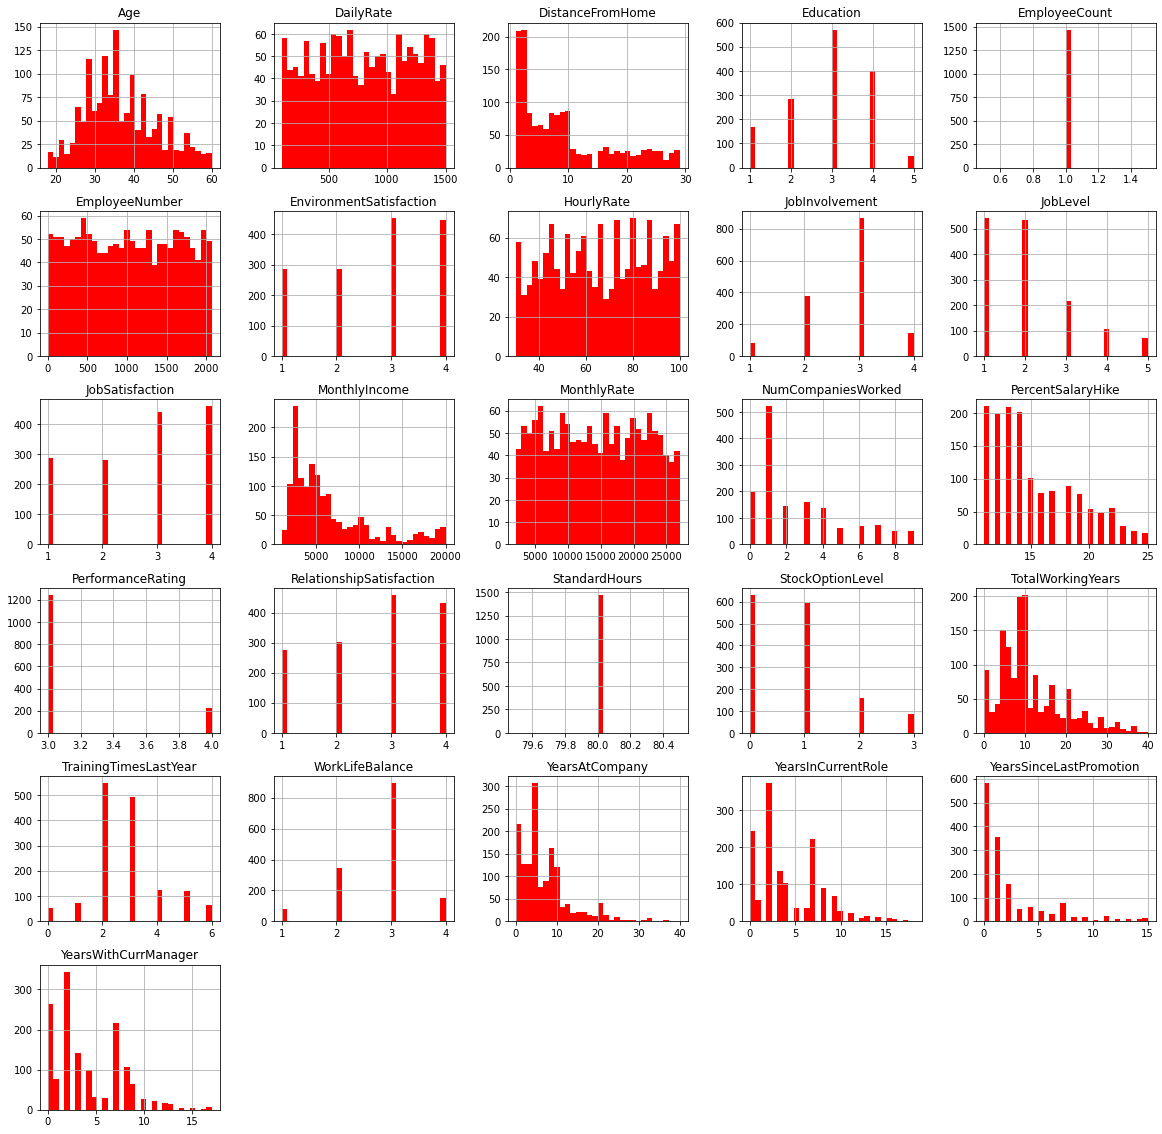

In [189]:
hr_df.toPandas().hist(bins =30,figsize = (20,20),color = 'r');

In [86]:
hrdf = pd.read_csv('08_Human_Resources.csv')

In [90]:
hrdf.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,...,4,80,1,10,3,3,10,7,1,7


In [91]:
hrdf.tail(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065.0,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068.0,...,1,80,0,6,3,4,4,3,1,2


In [104]:
hrdf.mean

<bound method DataFrame.mean of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [96]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1469 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1469 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1469 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1469 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [97]:
hrdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1469.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1025.556161,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,601.646166,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1556.000000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [102]:
hrdf.shape

(1470, 35)

In [107]:
hrdf.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

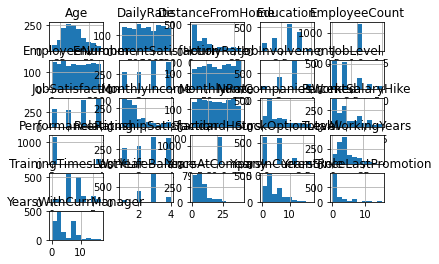

In [182]:
hrdf.hist()